In [13]:
import os
import pydub
import matplotlib.pyplot as plt

In [5]:
singers = os.listdir("wav_vocals")
singers

['Aref', 'Farhad', 'Mohammad Esfahani', 'Mohsen Yeganeh', 'Shadmehr Aghili']

In [6]:
for singer in singers:
    singer_songs = os.listdir(f"wav_vocals/{singer}/")
    print(singer_songs)

['Ki Behtar Az To', 'Soltane Ghalbha']
['Booye Eydi', 'Ye Shabe Mahtab']
['Booye Baran', 'Deldadegan']
['Behet Ghol Midam', 'Darkam Kon']
['Asemooni', 'Taghdir']


In [16]:
singers = os.listdir("wav_vocals")
for singer in singers:
    singer_songs = os.listdir(f"wav_vocals/{singer}/")
    for singer_song in singer_songs:
        
        folder_path = os.path.join("wav_vocals", singer, singer_song)
        vocals = os.listdir(f"wav_vocals/{singer}/{singer_song}")
        for vocal in vocals:
            vocal_path = os.path.join("wav_vocals", singer, singer_song, vocal)
            print(vocal_path)

wav_vocals\Aref\Ki Behtar Az To\vocals.wav
wav_vocals\Aref\Soltane Ghalbha\vocals.wav
wav_vocals\Farhad\Booye Eydi\vocals.wav
wav_vocals\Farhad\Ye Shabe Mahtab\vocals.wav
wav_vocals\Mohammad Esfahani\Booye Baran\vocals.wav
wav_vocals\Mohammad Esfahani\Deldadegan\vocals.wav
wav_vocals\Mohsen Yeganeh\Behet Ghol Midam\vocals.wav
wav_vocals\Mohsen Yeganeh\Darkam Kon\vocals.wav
wav_vocals\Shadmehr Aghili\Asemooni\vocals.wav
wav_vocals\Shadmehr Aghili\Taghdir\vocals.wav


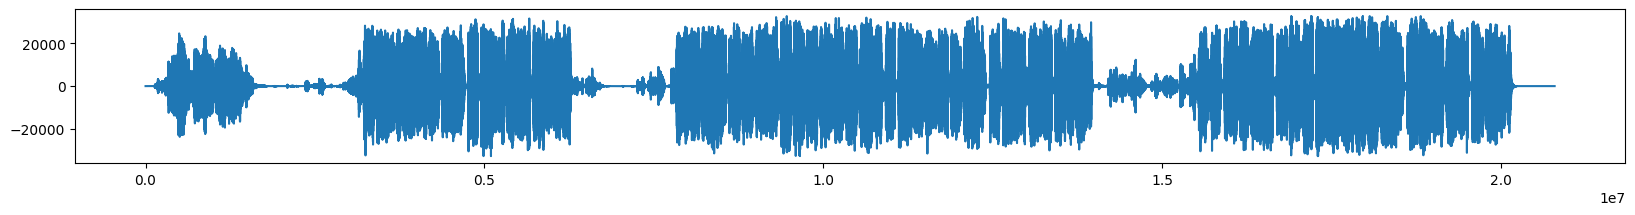

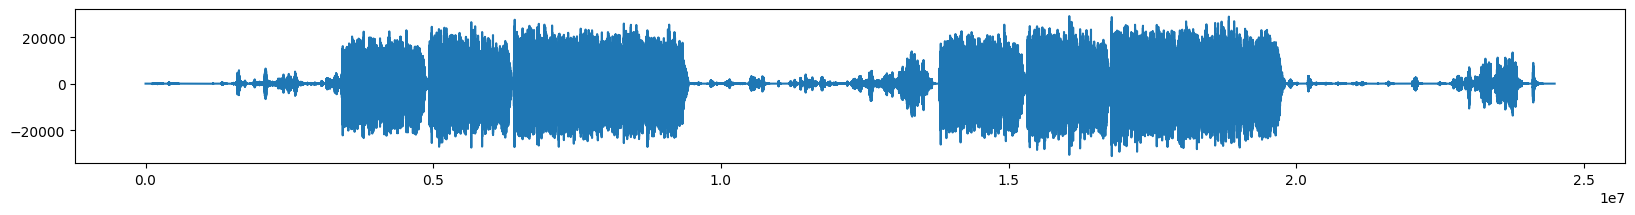

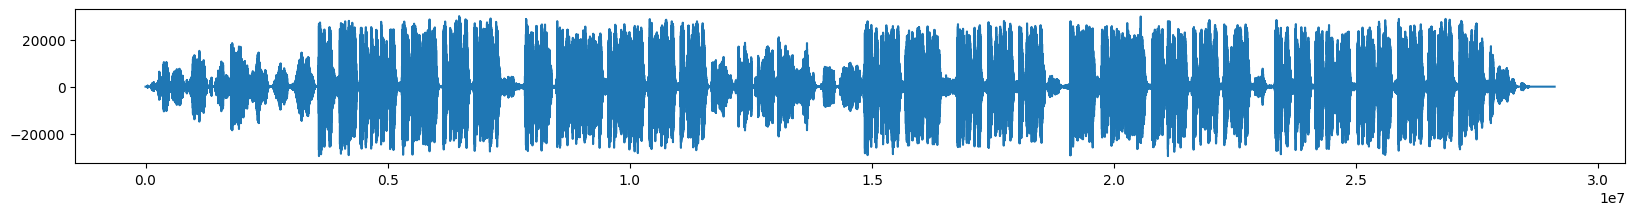

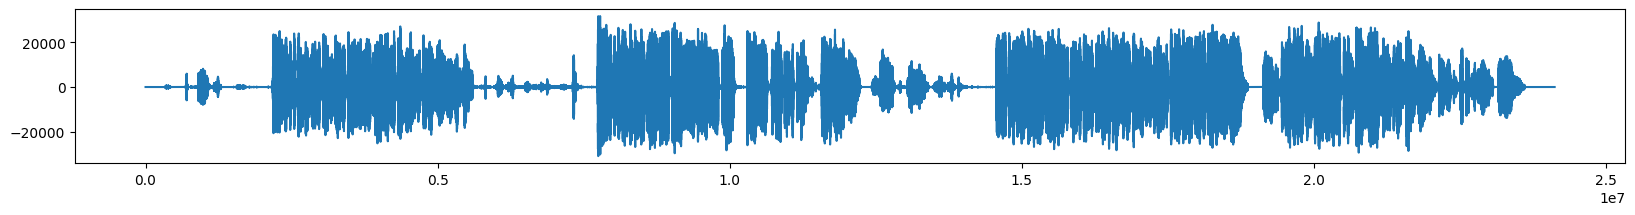

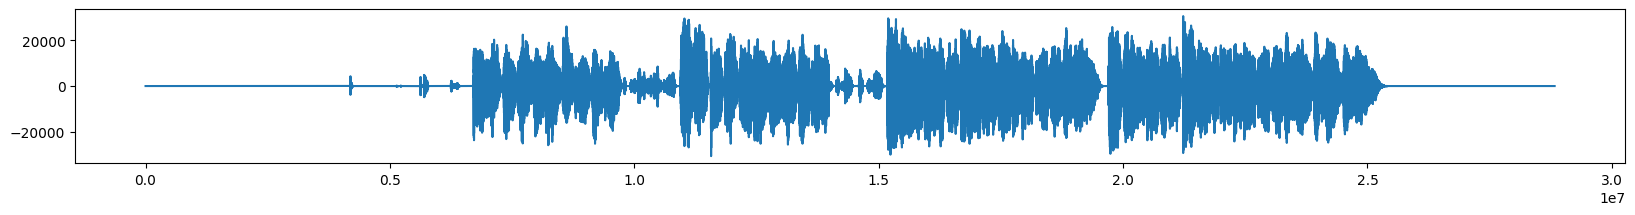

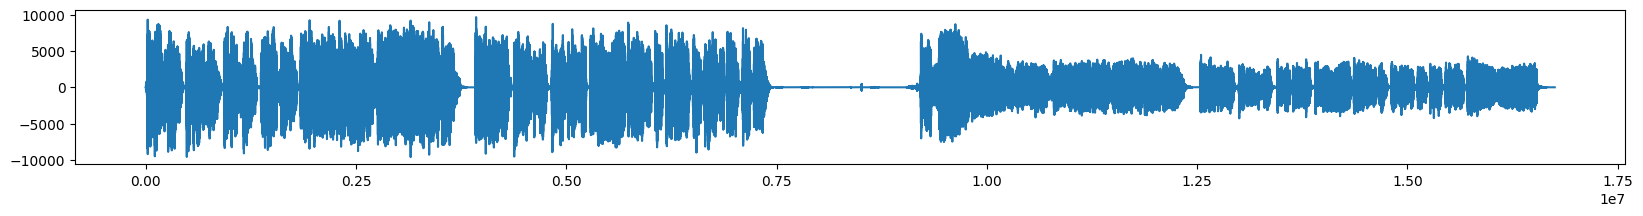

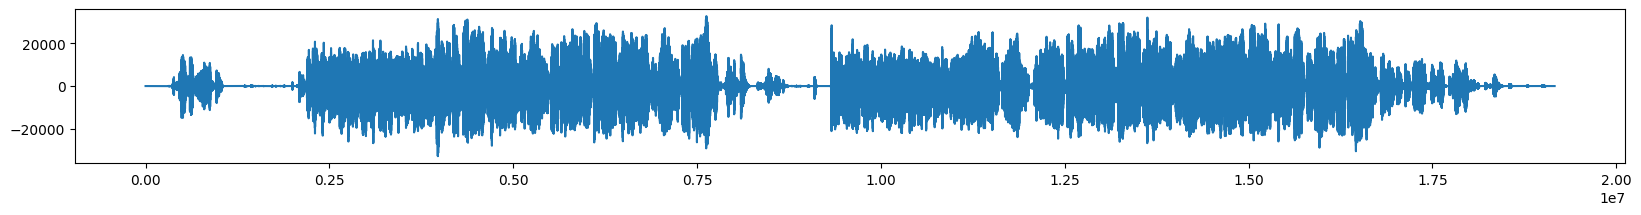

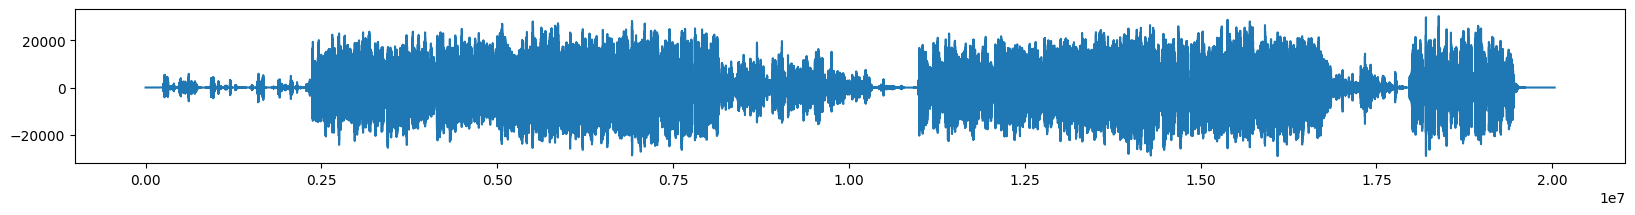

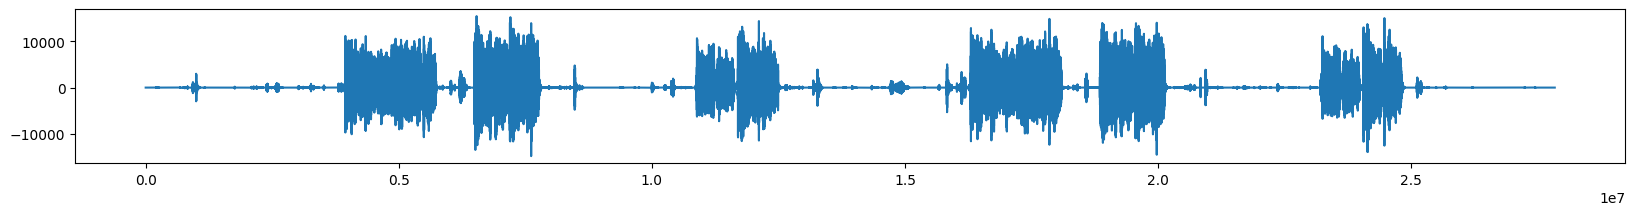

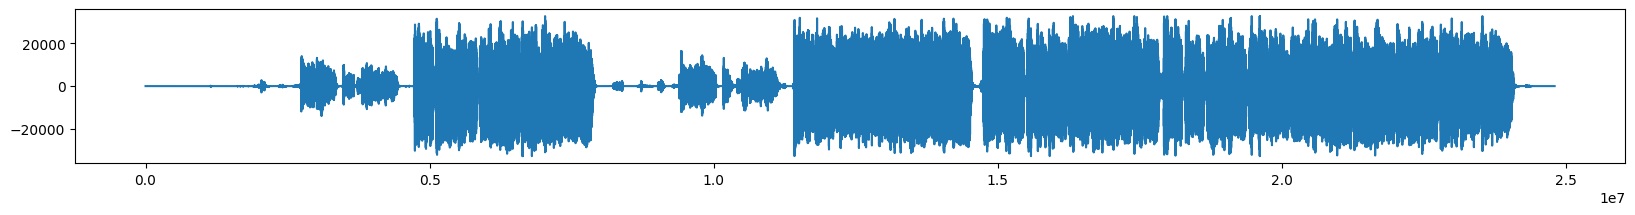

In [4]:
singers = os.listdir("wav_vocals")
for singer in singers:
    singer_songs = os.listdir(f"wav_vocals/{singer}/")
    os.makedirs(f"wav_data/{singer}" ,exist_ok=True)
    for singer_song in singer_songs:
        
        folder_path = os.path.join("wav_vocals", singer, singer_song)
        vocals = os.listdir(f"wav_vocals/{singer}/{singer_song}")
        for vocal in vocals:
            vocal_path = os.path.join("wav_vocals", singer, singer_song, vocal)
            audio = pydub.AudioSegment.from_file(vocal_path)

            audio_array = audio.get_array_of_samples()

            plt.figure(figsize=(20, 2))
            plt.plot(audio_array)
            plt.show()

            audio = audio.set_sample_width(2)  # convert to 16-bit (2 bytes per sample) to avoid tensorflow error
            audio = audio.set_frame_rate(48000)
            audio = audio.set_channels(1)  # convert stereo audio to mono audio to avoid tensorflow error

            chunks = pydub.silence.split_on_silence(audio, min_silence_len=2000, silence_thresh=-45)
            result = sum(chunks)
            file_name = singer_song.split(".")[0]
            result.export(f"wav_data/{singer}/{file_name}_vocals.wav")

In [ ]:
for folder in os.listdir("wav_data"):
    for file in os.listdir(f"wav_data/{folder}"):

        file_path = os.path.join("wav_data", folder, file)
        audio = pydub.AudioSegment.from_file(file_path)
        
        song_name = file.split(".")[0]
        folder_path = os.path.join("dataset", folder)
        os.makedirs(folder_path, exist_ok=True)

        chunks = pydub.utils.make_chunks(audio, 1000)

        for i , chunk in enumerate(chunks):
            if len(chunk) < 1000 :
                continue
            chunk.export(os.path.join("dataset", folder, f"{song_name}_{i}.wav"), format="wav")